Epoch 0, Train Loss: 0.41935107915768316, Test Loss: 0.2803144801309925
Epoch 1000, Train Loss: 0.16876356325546568, Test Loss: 0.0780686460225722
Epoch 2000, Train Loss: 0.0887334764671245, Test Loss: 0.0683869340682737
Epoch 3000, Train Loss: 0.08292913073991433, Test Loss: 0.05471473480125443
Epoch 4000, Train Loss: 0.08603159309239686, Test Loss: 0.06751316333232377
Epoch 5000, Train Loss: 0.06852133581972021, Test Loss: 0.04277455577599321
Epoch 6000, Train Loss: 0.07002285909041105, Test Loss: 0.05047093478350205
Epoch 7000, Train Loss: 0.07028717809805465, Test Loss: 0.05319952876994391
Epoch 8000, Train Loss: 0.06921329987225558, Test Loss: 0.05328018427055974
Epoch 9000, Train Loss: 0.0693314282860128, Test Loss: 0.055325326425296924
Accuracy: 0.9666666666666667


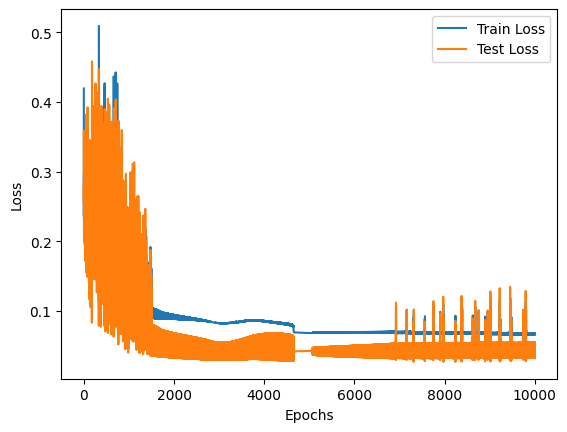

In [4]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Khởi tạo trọng số cho lớp ẩn và lớp đầu ra
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def forward(self, X):
        # Feedforward
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2
    
    def backward(self, X, y, learning_rate):
        # Backpropagation
        delta2 = (self.a2 - y) * self.sigmoid_derivative(self.a2)
        dW2 = np.dot(self.a1.T, delta2)
        db2 = np.sum(delta2, axis=0, keepdims=True)
        delta1 = np.dot(delta2, self.W2.T) * self.sigmoid_derivative(self.a1)
        dW1 = np.dot(X.T, delta1)
        db1 = np.sum(delta1, axis=0, keepdims=True)
        
        # Cập nhật trọng số
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        
    def train(self, X, y, losses=[], test_losses=[], epochs=10000, learning_rate=0.1, early_stopping_patience=10, min_delta=0.001):
        best_loss = float('inf')  # Dừng sớm - Khởi tạo tổn thất tốt nhất đến vô cùng
        count = 0  # Dừng sớm  - Khởi tạo bộ đếm kiên nhẫn 
        for epoch in range(epochs):
            # Feedforward
            output = self.forward(X)
            
            # Backpropagation
            self.backward(X, y, learning_rate)
            
            # Tính loss khi train
            loss = np.mean(np.square(y - output))
            losses.append(loss)
            
            # Tính loss khi test
            test_output = self.forward(X_test)
            test_loss = np.mean(np.square(y_test - test_output)) # độ mất mát thực tế 
            test_losses.append(test_loss)
            
            if epoch % 1000 == 0:
                print(f'Epoch {epoch}, Train Loss: {loss}, Test Loss: {test_loss}')
                
            # Dừng sớm 
            if loss < best_loss - min_delta:
                best_loss = loss
                count = 0  # Reset patience counter
            else:
                count += 1
                if count >= early_stopping_patience:
                    print("Early stopping !")
                    break

    def predict(self, X):
        # Dự đoán đầu ra
        return self.forward(X)

# CASE 1 
# X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# y = np.array([[0], [1], [1], [0]])

# CASE 2 
df = pd.read_csv('data_logistic.csv')
data = df.to_numpy()
X = data[:, :-1]  # Lấy tất cả các cột trừ cột cuối cùng là output
y = data[:, -1].reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Khởi tạo mạng neural network
model = NeuralNetwork(input_size=2, hidden_size=8, output_size=1) 

# Huấn luyện mạng neural network
# Huấn luyện mạng neural network và tính mảng loss khi train và test
losses = []  # List để lưu giá trị loss function qua các epoch khi train
test_losses = []  # List để lưu giá trị loss function qua các epoch khi test
# model.train(X_train, y_train, losses, epochs=10000, learning_rate=0.1)
model.train(X_train, y_train, losses, test_losses, epochs=10000, learning_rate=0.1, early_stopping_patience = 10000 , min_delta = 0.00001)

# Dự đoán đầu ra
predictions = model.predict(X_test)
# Chuyển đổi các giá trị dự đoán thành các nhãn nhị phân (0 hoặc 1)
predictions_binary = (predictions > 0.5).astype(int)
accuracy = np.mean(predictions_binary == y_test)
# print("predictions:", predictions)
# print("predictions_binary:", predictions_binary)
print("Accuracy:", accuracy)

# Vẽ đường loss
plt.plot(losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


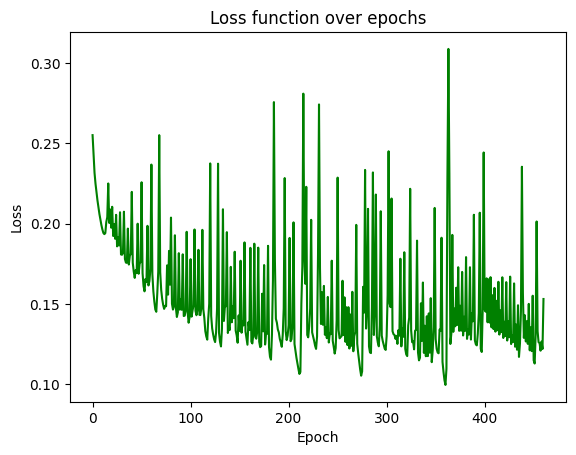

In [2]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ hàm loss function qua các epoch
plt.plot(losses,color='green')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss function over epochs')
plt.show()

    #ở đây : early_stopping = keras.callbacks.EarlyStopping(
    #    patience=10,
    #    min_delta=0.001,
    #    restore_best_weights=True,
    #) trong 10 eposche liên tiếp nếu không quá 0.001 thì dừng sớm 

Đúng, trong đoạn mã mà bạn đã cung cấp, keras.callbacks.EarlyStopping được sử dụng để thiết lập điều kiện dừng sớm (early stopping) trong quá trình huấn luyện mạng nơ-ron. Cụ thể:

patience=10: Đây là số lượng epoch mà mô hình sẽ chờ trước khi dừng nếu không có cải thiện đáng kể trong việc giảm thiểu hàm mất mát. Trong trường hợp này, nếu không có cải thiện trong 10 epoch liên tiếp, quá trình huấn luyện sẽ dừng.

min_delta=0.001: Đây là ngưỡng tối thiểu mà hàm mất mát phải giảm đi để xem xét là có cải thiện đáng kể hay không. Nếu giảm thiểu không vượt qua ngưỡng này, quá trình huấn luyện sẽ dừng.

restore_best_weights=True: Nếu được đặt là True, trọng số tốt nhất được lưu trong quá trình huấn luyện sẽ được khôi phục sau khi quá trình dừng sớm.

Điều này giúp tránh việc mô hình bị overfitting và tăng hiệu suất của mạng nơ-ron.






